### 3.4 Classifying IMDB movie reviews

Learning basic (binary) classification task by creating a ML model to classify IMDB reviews, whether it is Positive or Negative.

We'll use dataset that already prepared by Keras library.

In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [5]:
# Load dataset
# num_words = 100000 means we only load 10000 the most occurring words in the reviews
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Those dataset are not in plain words but instead they are list of index that map to the index of every word in the reviews.

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

That means the first review on our train dataset is a positive review.

Now lets maps back those list of index to sentence.

In [9]:
word_index = imdb.get_word_index()

In [10]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
# Now we can convert our list of index to sentence
# note: word index starts from 3 because 0, 1, 2 are reserved for "padding", "start of the word" and "unknown" word
sentence = " ".join([reverse_word_index.get(i - 3, '[?]') for i in train_data[0]])
sentence

"[?] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [?] is an amazing actor and now the same being director [?] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [?] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [?] to the two little boy's that played the [?] of norman and paul they were just brilliant children are often left out of the [?] list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

### Data preprocessing, vectorize the word indicies (sequences of word index)

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [14]:
# Vectorize the features
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [17]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Build the model

In [59]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop', # or `optimizers.RMSprop(lr=0.001)` where lr = learning rate
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [60]:
# To validates the model we need to split our train dataset into 2, so we'll have:
# - Train dataset
# - Validation datase
# - Test dataset
x_validation = x_train[:10000] # the first 10000
x_train_ = x_train[10000:]

# we do the same with labels
y_validation = y_train[:10000]
y_train_ = y_train[10000:]

In [61]:
# Run model training
EPOCHS = 20
BATCH_SIZE = 512

training_history = model.fit(
    x_train_,
    y_train_,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5178 - accuracy: 0.7813 - val_loss: 0.3883 - val_accuracy: 0.8753
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3053 - accuracy: 0.9057 - val_loss: 0.3183 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2207 - accuracy: 0.9280 - val_loss: 0.2883 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1755 - accuracy: 0.9430 - val_loss: 0.2785 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1444 - accuracy: 0.9529 - val_loss: 0.3027 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1162 - accuracy: 0.9637 - val_loss: 0.3414 - val_accuracy: 0.8705
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0961 - accuracy: 0.9719 - val_loss: 0.3177 - val_accuracy: 0.8816
Epoch 8/20
30

In [62]:
training_history.history

{'loss': [0.5178400278091431,
  0.3053463101387024,
  0.22070108354091644,
  0.17549815773963928,
  0.14444230496883392,
  0.11620154976844788,
  0.09614811092615128,
  0.07971782237291336,
  0.06519551575183868,
  0.05461874231696129,
  0.040816061198711395,
  0.0339667871594429,
  0.025197220966219902,
  0.022981585934758186,
  0.015073705464601517,
  0.009840254671871662,
  0.01300552487373352,
  0.004997716285288334,
  0.007293051574379206,
  0.005160486325621605],
 'accuracy': [0.7812666893005371,
  0.9056666493415833,
  0.9279999732971191,
  0.9430000185966492,
  0.9529333114624023,
  0.9637333154678345,
  0.9718666672706604,
  0.9780666828155518,
  0.9832000136375427,
  0.986133337020874,
  0.9909999966621399,
  0.9922666549682617,
  0.9955999851226807,
  0.9953333139419556,
  0.9979333281517029,
  0.9993333220481873,
  0.9974666833877563,
  0.9998000264167786,
  0.9991333484649658,
  0.9990000128746033],
 'val_loss': [0.38830694556236267,
  0.31832143664360046,
  0.288283199071

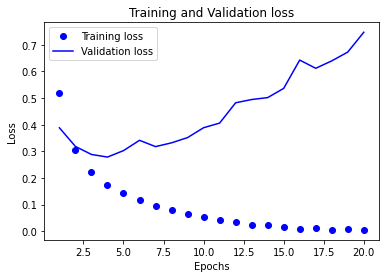

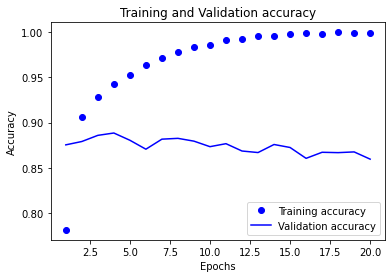

In [63]:
# Visualise our model performance

import matplotlib.pyplot as plt

loss_values = training_history.history['loss']
validation_loss_values = training_history.history['val_loss']
accuracy = training_history.history['accuracy']
validation_accuracy = training_history.history['val_accuracy']

epochs = range(1, EPOCHS + 1)

# Loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From above graphs we can see that our Training loss is decreasing over time (GOOD),
but our Validation loss increasing (BAD).

Same with accuracy, Training accuracy increasing(GOOD), but Validation accuracy decreasing (BAD)

In other word, **Our model are great on training, but perform bad when given new (validation) data** or also called **Overfitting**.

### Naive approach to fix our model

Our model seems perform pretty good until epoch=4, so we could stop the training there to prevent it from overfitting on epoch=5 and larger.

In [82]:
# NOTE: This time we use our whole train dataset for training.
model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=BATCH_SIZE)

Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0665 - accuracy: 0.9806
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0501 - accuracy: 0.9854
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0382 - accuracy: 0.9890
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0288 - accuracy: 0.9916


In [83]:
# Then lets's evaluate it using our test dataset
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 791us/step - loss: 0.7197 - accuracy: 0.8526


We can see our model have accuracy of 85%.

### Use for prediction

In [84]:
model.predict(x_test)

array([[0.00633901],
       [1.        ],
       [0.99902785],
       ...,
       [0.01731983],
       [0.03290886],
       [0.95867765]], dtype=float32)

We can see the values:

- When it near 0.95 or greater, our model is confident that those reviews are Positive
- When it near 0 eg. 0.01, 0.03, our moded is confident that those reviews are Negative
- While 0.4, 0.5, 0.6, our model are not quite confident to determine whea